# Mini proyecto 2
María Ferrnanda López -17160
Ana Lucía Hernández - 17138

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

## Función acumulada ponderada

$F(x)= \sum \limits _{i=1} ^{n} p_{i} F_{i}(x)$

#### Algoritmo para generar V

1. Encontrar un valor para n
2. Definir la función de probabilidad acumulada $F_{i}(x)$ para i de 1 hasta n
3. Generar una constante H tal que,esta se encuentre entre el dominio de los enteros positivos y que cumpla con: $P(I = i)= p_{i}$
4. Para todod los valores posibles evaluar:
    Si $I=i$ entonces:
    obtener $Y_{i}$ a partir de $F_{i} (x)$
5. Asignar X como $Y_{i}$
6. Repetir pasos 3 y 4 para todo los valores de I y así obtener la variable aleatoria


#### Demostración de algoritmo

$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(X ≤ x│I = i)P(I = i)$
$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(Y_{i} ≤ x)P(I = i)$
$P(X ≤ x)= \sum \limits _{i=1} ^{n} F_{i}(x)p_{i} $
$P(X ≤ x)=  F_{i} (x) $

## Función acumulada ponderada (programa)

Para realizar este ejercicio se utilizará la siguiente función de masa:

$ F(b) = \left\{
\begin{array}{ll}
    0 & b < 0 \\
    1/4 & 0 \leq b < 1 \\
    1/10 & 1 \leq b <2 \\
    1/20 & 2 \leq b < 3 \\
    1/5 & 3 \leq b < 3.5 \\
    2/5 & b \geq 3.5
\end{array}
\right.
$

In [50]:
frequencies = []# se usara para obtener las frecuencias de los steps/rangos
def mass_function(number):
    if number < 0:
        frequencies.append(0)
        return 0
    elif 0 <= number and  number < 1:
        frequencies.append(1)
        return 1/4
    elif 1 <= number and number < 2:
        frequencies.append(2)
        return 1/10
    elif 2 <= number and number < 3:
        frequencies.append(3)
        return 1/20
    elif 3 <= number and number < 3.5:
        frequencies.append(3.5)
        return 1/5
    elif number >= 3.5:
        frequencies.append(5)
        return 2/5

In [53]:
n = 1000
randoms = [ random.uniform(-10, 10) for i in range(n) ]
probabilities = [ mass_function(number) for number in randoms ]


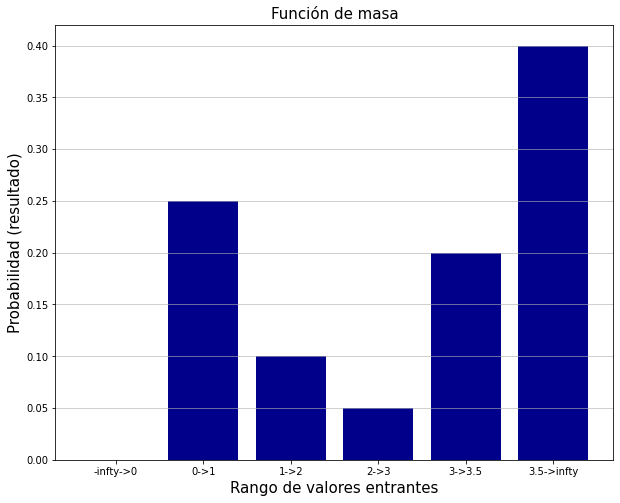

In [76]:
# representación gráfica de la función de masa 
plt.figure(figsize=[10,8])
results = [0, 1/4, 1/10, 1/20, 1/5, 2/5]
input_range = ["-infty->0", "0->1", "1->2", "2->3", "3->3.5", "3.5->infty"]
plt.bar(input_range, results, color='#00008B')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Rango de valores entrantes',fontsize=15)
plt.ylabel('Probabilidad (resultado)',fontsize=15)
plt.title('Función de masa',fontsize=15)
plt.show()

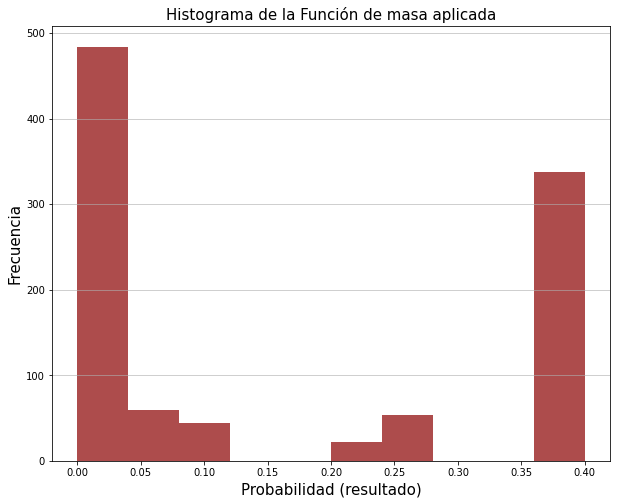

In [72]:
plt.figure(figsize=[10,8])
plt.hist(probabilities, color='#8B0000',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Probabilidad (resultado)',fontsize=15)
plt.ylabel('Frecuencia',fontsize=15)
plt.title('Histograma de la Función de masa aplicada',fontsize=15)
plt.show()

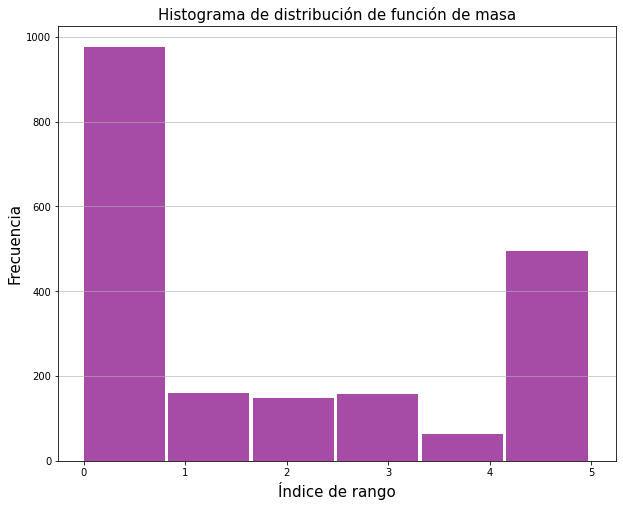

In [73]:
plt.figure(figsize=[10,8])
plt.hist(frequencies, color='purple',alpha=0.7, width = 0.8, bins = 6)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Índice de rango',fontsize=15)
plt.ylabel('Frecuencia',fontsize=15)
plt.title('Histograma de distribución de función de masa',fontsize=15)
plt.show()

En la gráfica anterior, el eje X indica en índice del rango o step en el cual quedaron los valores random. Con esto se hace referencia a que la gráfica representa cuántos números aleatorios, al aplicarles la función de masa, su resultado fue de $-\infty$ a 0, cuántos fueron de 0 a 1, cuántos de 1 a 2, así sucesivamente. 

## Valor presente neto

In [5]:
## funcion para generar variables aleatorias normales - tomada de ejemplo en clase 
def varNormal(mu, sigma):
    while True:
        lambdav = 1
        y1 = -(1/lambdav) * math.log(random.random())
        y2 = -(1/lambdav) * math.log(random.random())
        if (y2 - ((y1 - 1) ** 2) / 2) > 0:
            y1 = y2 - ((y1 - 1) ** 2) / 2
            x = random.random()
            if x <= 0.5:
                return mu + sigma * y1
            else:
                return mu - sigma * y1
    

In [21]:
#simulacion se aplica la formula de vpn 
def simulacionHotel(iters, retorno):
    sims = []
    for x in range(iters):
        vpn = -800
        vpn += varNormal(-800,50) / ((1 + retorno) ** 1) 
        vpn += varNormal(-800,100) / ((1 + retorno) ** 2) 
        vpn += varNormal(-700,150) / ((1 + retorno) ** 3) 
        vpn += varNormal(300,200) / ((1 + retorno) ** 4) 
        vpn += varNormal(400,200) / ((1 + retorno) ** 5) 
        vpn += varNormal(500,200) / ((1 + retorno) ** 6) 
        vpn += np.random.uniform(200,8440) / ((1 + retorno) ** 7)
        sims.append(vpn)
    
    plt.hist(sims, bins=10)
    title = 'Histograma Hotel ' + str(iters) + ' iteraciones'
    plt.xlabel('Valor',fontsize=15)
    plt.ylabel('Frecuencia',fontsize=15)
    plt.title(title)
    plt.show()
    
    return sims

In [22]:
def simulacionMall(iters, retorno):
    sims = []
    for x in range(iters):
        vpn = -900
        vpn += varNormal(-600,50) / ((1 + retorno) ** 1) 
        vpn += varNormal(-200,50) / ((1 + retorno) ** 2)
        vpn += varNormal(-600,100) / ((1 + retorno) ** 3) 
        vpn += varNormal(250,150) / ((1 + retorno) ** 4) 
        vpn += varNormal(350,150) / ((1 + retorno) ** 5) 
        vpn += varNormal(400,150) / ((1 + retorno) ** 6) 
        vpn += np.random.uniform(1600,6000) / ((1 + retorno) ** 7) 
        sims.append(vpn)
    plt.hist(sims, bins=10, color="orange")
    title = 'Histograma Centro Comercial ' + str(iters) + ' iteraciones'
    plt.xlabel('Valor',fontsize=15)
    plt.ylabel('Frecuencia',fontsize=15)
    plt.title(title)
    plt.show()
    
    return sims

In [33]:
def comparacionResultados(iters, simsH, simsC):
    h = 0 
    cc = 0

    for sim in simsH:
        if sim > 0:
            h = h + 1

    for sim in simsC:
        if sim > 0:
            cc = cc + 1 

    print("Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de :",h," -- ", h*100/iters,"%")
    print("Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de :",cc," -- ", cc*100/iters,"%")
    

### Simulacion para 100

#### Hotel

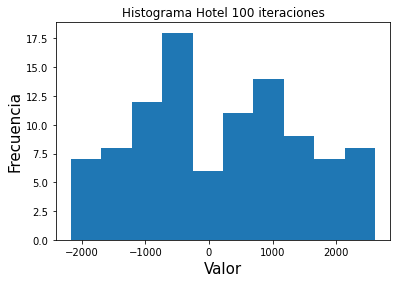

In [25]:
simsHotel1 = simulacionHotel(100, 0.1)

#### Centro Comercial

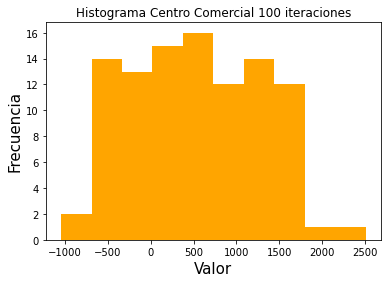

In [26]:
simsMall1 = simulacionMall(100, 0.1)

### Simulacion 1000

#### Hotel

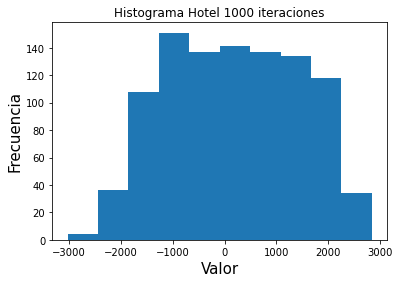

In [27]:
simsHotel2 = simulacionHotel(1000, 0.1)

#### Centro Comercial

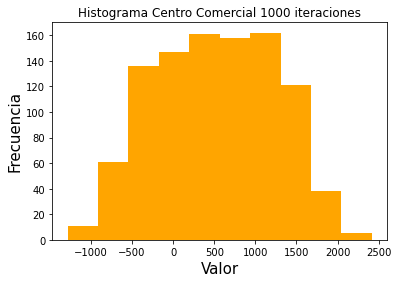

In [28]:
simsMall2 = simulacionMall(1000, 0.1)

### Simualacion 10000

#### Hotel

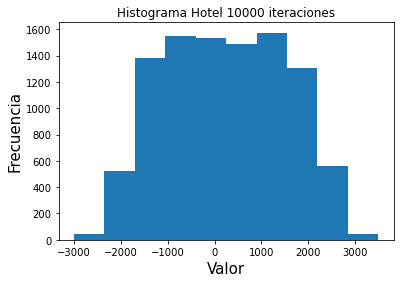

In [30]:
simsHotel3 = simulacionHotel(10000, 0.1)

#### Centro Comercial

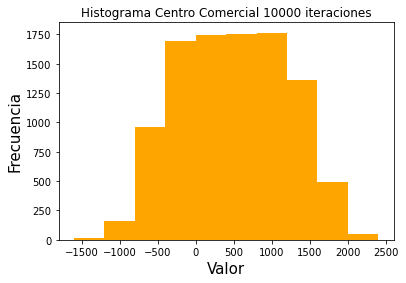

In [31]:
simsMall3 = simulacionMall(10000, 0.1)

### Analisis de resultados de VPN por cada proyecto

In [34]:
comparacionResultados(100, simsHotel1, simsMall1)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 53  --  53.0 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 73  --  73.0 %


In [35]:
comparacionResultados(1000, simsHotel2, simsMall2)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 542  --  54.2 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 721  --  72.1 %


In [36]:
comparacionResultados(10000, simsHotel3, simsMall3)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 5524  --  55.24 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 7161  --  71.61 %


Es más rentable invertir en el proyecto del centro comercial, ya que se puede observar que los porcentajes en los que un vpn sera más alto o mayor a 0, es mayor a comparación del proyecto del hotel en el cual no logra aumentar de un 55%

## Repartidor de periódicos

In [85]:
PAGO = 1.50
VENDO = 2.50
RETORNO = 0.5
# los siguientes describen los porcentajes en los que se piden 9, 10 y 11 periódicos 
# piden_9 = 0.3
# piden_10 = 0.7
# piden_11 = 1

In [180]:

def sell_simulation(dias):
    ventas_resumen = {"9":0, "10":0, "11":0} # cantidad de periódicos que vende todos los días (resumido), "ventas" contiene la lista de periodicos que vendio cada dia individual
    ventas_pdia = []
    for i in range(dias):
        suceso = random.random()
        if suceso <= 0.3: # está en el 30% de las ocasiones en donde vende 9 periódicos al día
            ventas_resumen["9"] += 1
            ventas_pdia.append(9)
        elif suceso <= 0.7 and suceso > 0.3: # está en el 40% de las ocasiones en donde vende 10 periódicos al día
            ventas_resumen["10"] += 1
            ventas_pdia.append(10)
        elif suceso <= 1 and suceso > 0.7: # está en el 30% de las ocasiones en donde vende 11 periódicos al día
            ventas_resumen["11"] += 1
            ventas_pdia.append(11)
    
    # con cuánto dinero quedará al final del mes si todos los días compra cada cantidad de periódicos respectivos
    cierre = {"9":0, "10":0, "11":0} 
    for comprados_pdia in ventas_resumen.keys():
        # lo que ganó al venderlos
        ganancia = sum(ventas_pdia) * VENDO
        # lo que gastó al comprarlos
        gasto = dias * PAGO * int(comprados_pdia)
        # lo que reembolsó al no vender:
        # (la cantidad que compro todos los dias - la cantidad que vendio por dia) * costo_reembolso * dias
        reembolso = 0
        for venta_dia in ventas_pdia:
            if venta_dia < int(comprados_pdia):
                reembolso += abs(venta_dia - int(comprados_pdia)) * RETORNO
            # si ese dia tenia que vender mas de lo que compro, fue una perdida, la cantidad de periodicos que tuvo que haber vendido pero no pudo porque le faltaban, se le resta a la ganancia 
            # que se calculo inicialmente
            elif venta_dia > int(comprados_pdia):
                ganancia -= abs(venta_dia - int(comprados_pdia)) * VENDO
        resultado = ganancia - gasto - reembolso
        cierre[comprados_pdia] = resultado if resultado >= 0 else 0
    return ventas_resumen, ventas_pdia, cierre


### Simulación para un mes 
Se asumirá que un mes tiene 30 días,y  un año 365 días y 10 años 3650 días.

In [184]:
ventas, resultados_sim, dinero_final = sell_simulation(30)


In [185]:
# impresión de resultados
for venta in ventas.keys():
    print("Cierre al mes para cuando se compró {} periódicos todos los días: \n\t---->> cantidad ventidos: {} \n\t---->> ganancia total: {}".format(venta, ventas[venta], dinero_final[venta]))

Cierre al mes para cuando se compró 9 periódicos todos los días: 
	---->> cantidad ventidos: 8 
	---->> ganancia total: 270.0
Cierre al mes para cuando se compró 10 periódicos todos los días: 
	---->> cantidad ventidos: 10 
	---->> ganancia total: 276.0
Cierre al mes para cuando se compró 11 periódicos todos los días: 
	---->> cantidad ventidos: 12 
	---->> ganancia total: 252.0


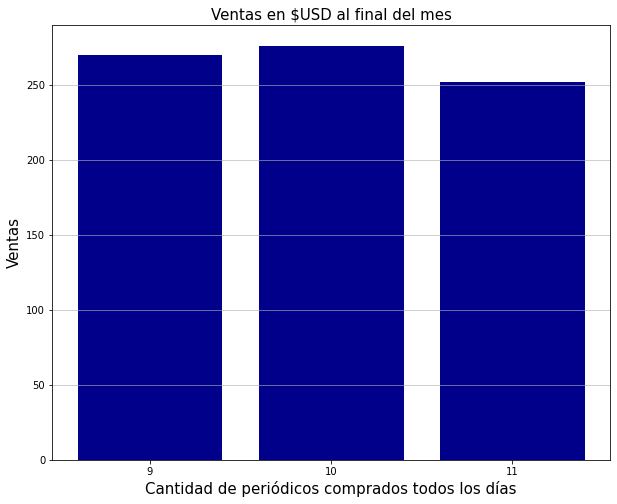

In [186]:
# grafica de resultados
# representación gráfica de la función de masa 
plt.figure(figsize=[10,8])
ventas_finales = [venta for key, venta in dinero_final.items()]
input_range = [ key for key in ventas.keys()]
plt.bar(input_range, ventas_finales, color='#00008B')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cantidad de periódicos comprados todos los días',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
plt.title('Ventas en $USD al final del mes',fontsize=15)
plt.show()

### Simulación para un año

In [187]:
ventas, resultados_sim, dinero_final = sell_simulation(365)

In [188]:
# impresión de resultados
for venta in ventas.keys():
    print("Cierre al mes para cuando se compró {} periódicos todos los días: \n\t---->> cantidad ventidos: {} \n\t---->> ganancia total: {}".format(venta, ventas[venta], dinero_final[venta]))

Cierre al mes para cuando se compró 9 periódicos todos los días: 
	---->> cantidad ventidos: 105 
	---->> ganancia total: 3285.0
Cierre al mes para cuando se compró 10 periódicos todos los días: 
	---->> cantidad ventidos: 149 
	---->> ganancia total: 3335.0
Cierre al mes para cuando se compró 11 periódicos todos los días: 
	---->> cantidad ventidos: 111 
	---->> ganancia total: 2938.0


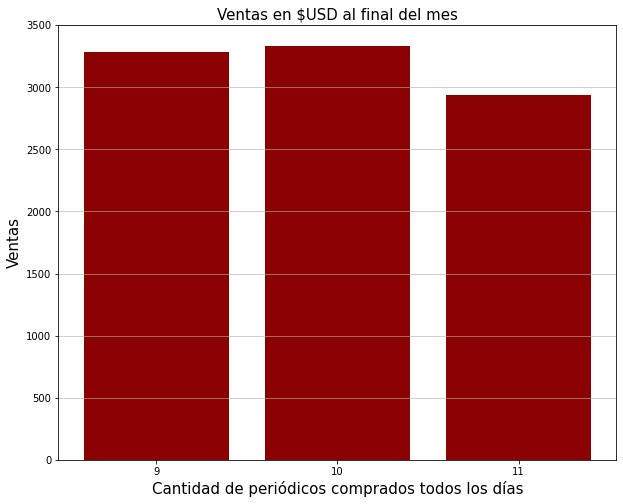

In [190]:
# grafica de resultados
# representación gráfica de la función de masa 
plt.figure(figsize=[10,8])
ventas_finales = [venta for key, venta in dinero_final.items()]
input_range = [ key for key in ventas.keys()]
plt.bar(input_range, ventas_finales, color='#8B0000')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cantidad de periódicos comprados todos los días',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
plt.title('Ventas en $USD al final del mes',fontsize=15)
plt.show()

### Simulación para 10 años

In [191]:
ventas, resultados_sim, dinero_final = sell_simulation(3650)

In [192]:
# impresión de resultados
for venta in ventas.keys():
    print("Cierre al mes para cuando se compró {} periódicos todos los días: \n\t---->> cantidad ventidos: {} \n\t---->> ganancia total: {}".format(venta, ventas[venta], dinero_final[venta]))

Cierre al mes para cuando se compró 9 periódicos todos los días: 
	---->> cantidad ventidos: 1083 
	---->> ganancia total: 32850.0
Cierre al mes para cuando se compró 10 periódicos todos los días: 
	---->> cantidad ventidos: 1419 
	---->> ganancia total: 33251.0
Cierre al mes para cuando se compró 11 periódicos todos los días: 
	---->> cantidad ventidos: 1148 
	---->> ganancia total: 29395.0


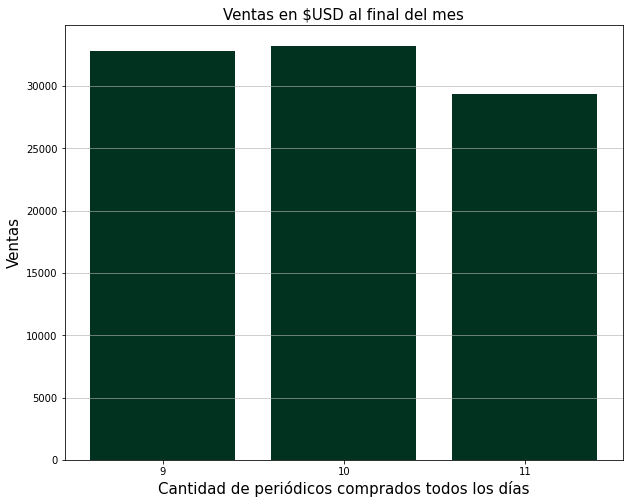

In [193]:
# grafica de resultados
# representación gráfica de la función de masa 
plt.figure(figsize=[10,8])
ventas_finales = [venta for key, venta in dinero_final.items()]
input_range = [ key for key in ventas.keys()]
plt.bar(input_range, ventas_finales, color='#013220')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cantidad de periódicos comprados todos los días',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
plt.title('Ventas en $USD al final del mes',fontsize=15)
plt.show()

Al observar las gráficas, es fácil apreciar que en todas las simulaciones, comprar 10 periódicos al día, todos los días es lo que más le conviene, es donde logra vender más y se queda con mayores ganancias. Este número tiene sentido, ya que si comprara 9 periódicos diarios, en el 60% de las ocasiones, se quedaría corto en periódicos para vender (la gente le llegaría a comprar pero él ya no tiene más porque ya los vendió todos), por lo que las ganancias no son tan altas como podrían ser. Por otro lado, si comprara 11 todos los días, en la mayoría de los casos deberá reembolsar lo que no vendió, lo que reduce sus ganancias porque incurre en gastos extras. 

El 10 parece ser el número justo para no siempre quedarse corto y no siempre tener que reembolsar, además que, según lo definido, el que le pidan 10 periódicos al día sucede de manera más frecuente (es más probable) que las otras dos situaciones, por lo que venderá todos los periódicos que tiene, no se quedará sin vender tan frecuentemente y no tendrá que reembolsar tan frecuentemente tampoco. 